# CNN Model -VGG16-Face Recognition-Transfer Learning using VGG16

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this. 224 ,224 is The default input size for VGG16
IMAGE_SIZE = [224, 224]  

In [3]:
train_path = 'D:/Dog vs Cats Data Augmentation-Udemy/train'
valid_path = 'D:/Dog vs Cats Data Augmentation-Udemy/test'

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('D:/Dog vs Cats Data Augmentation-Udemy/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('D:/Dog vs Cats Data Augmentation-Udemy/train',
                                                target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/Dog vs Cats Data Augmentation-Udemy/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1095 images belonging to 2 classes.
Found 4441 images belonging to 2 classes.


In [12]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
35/35 [==============================] - 1485s 42s/step - loss: 0.1133 - accuracy: 0.9689 - val_loss: 40.9871 - val_accuracy: 0.0482
Epoch 2/5
35/35 [==============================] - 1609s 46s/step - loss: 0.0763 - accuracy: 0.9982 - val_loss: 37.4548 - val_accuracy: 0.0482
Epoch 3/5
35/35 [==============================] - 1823s 52s/step - loss: 0.0635 - accuracy: 0.9982 - val_loss: 32.2810 - val_accuracy: 0.0482
Epoch 4/5
35/35 [==============================] - 1741s 50s/step - loss: 0.0330 - accuracy: 0.9982 - val_loss: 24.9563 - val_accuracy: 0.0482
Epoch 5/5
35/35 [==============================] - 1724s 49s/step - loss: 0.0167 - accuracy: 0.9982 - val_loss: 17.1965 - val_accuracy: 0.0480


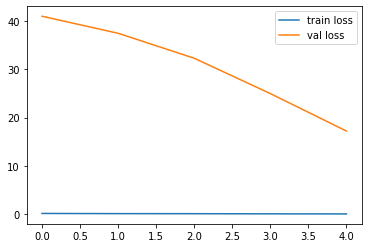

<Figure size 432x288 with 0 Axes>

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

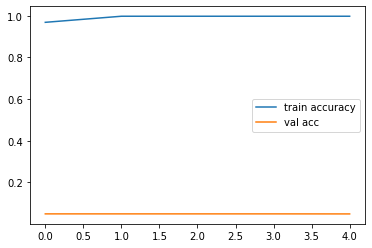

<Figure size 432x288 with 0 Axes>

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [18]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')